<a href="https://colab.research.google.com/github/FilosoDev/experimentos-python/blob/main/Pratica_Bootcamp_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --upgrade keras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 13.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.4.1 which is incompatible.


In [ ]:
import numpy #importa biblioteca para manipulação de matrizes
from matplotlib import pyplot as plt  #importa biblioteca para criação de gráficos

#inicio das importações de classes do Keras (modelos de Deep Learning)
from keras.datasets import mnist #importa dataset mnist
from keras.models import Sequential #importa um modelo sequencial
from keras.layers import Dense, Dropout, Input, InputLayer #importa camadas totalmente conectadas
from keras.layers import Dropout #importa a estrutura de dropout

#from keras.utils import np_utils #importa biblioteca de utilidade do Keras
from keras.utils import to_categorical

(60000, 28, 28)


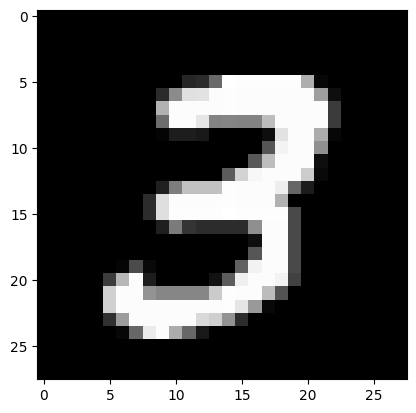

3


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #importa o dataset Mnist da biblioteca do Keras
print(X_train.shape) #imprime o tamanho do vetor

first_image = X_train[7] #obtém a imagem de treino no índice 100 do vetor
#realiza a manipulação dos dados da imagem
first_image = numpy.array(first_image, dtype='float')
pixels = first_image.reshape((28,28))
#exibe a imagem do vetor
plt.imshow(pixels, cmap='gray')
plt.show()


print(y_train[7]) #imprime a classe da imagem de treino do índice 100

In [ ]:
num_pixels = X_train.shape[1] * X_train.shape[2] #calcula o total de pixels da imagem
print(num_pixels)

#transforma os valores dos pixels para float32
X_train2 = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test2 = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

#normalizando os valores dos pixels entre 0 e 1
X_train2 = X_train2 / 255
X_test2 = X_test2 / 255

print(X_train[7])
print(X_train2[7])

#print(first_image)

784
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  38  43 105 255 253 253 253
  253 253 174   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  43 139 224 226 252 253 252 252 252
  252 252 252 158  14   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 178 252 252 252 252 253 252 252 252
  252 252 252 252  59   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 109 252 252 230 132 13

In [ ]:
#transforma os y em one-hot vector
y_train_h = to_categorical(y_train)
y_test_h = to_categorical(y_test)

#obtém o número de classes do problema
num_classes = y_test_h.shape[1]

print(num_pixels)
print(y_train[1001])
print(y_train_h[1001])
print(num_classes)

784
7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
10


In [ ]:
# cria um modelo do tipo sequencial
model = Sequential()
model.add(InputLayer(input_shape=(num_pixels,)))  #cria a camada de entrada
model.add(Dense(1024, kernel_initializer='normal', activation='relu')) #cria a primeira camada da rede
model.add(Dense(2048, kernel_initializer='normal', activation='relu')) #cria a segunda camada da rede
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax')) #cria a camada de saída

model.summary() #imprime informaçoes sobre o modelo

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1024)                │         803,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2048)                │       2,099,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          20,490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,923,530 (11.15 MB)

 Trainable params: 2,923,530 (11.15 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='crossentropy', optimizer='adam', metrics=['accuracy']) #compila o modelo criado
result = model.fit(X_train2, y_train_h, validation_data=(X_test2, y_test_h), epochs=20, verbose=1, batch_size=100) #executa o treinamento

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 51s 83ms/step - accuracy: 0.9088 - loss: 0.3128 - val_accuracy: 0.9731 - val_loss: 0.0874
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 48s 81ms/step - accuracy: 0.9797 - loss: 0.0662 - val_accuracy: 0.9732 - val_loss: 0.0856
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 83s 83ms/step - accuracy: 0.9864 - loss: 0.0428 - val_accuracy: 0.9763 - val_loss: 0.0721
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.9895 - loss: 0.0317 - val_accuracy: 0.9776 - val_loss: 0.0804
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.9918 - loss: 0.0258 - val_accuracy: 0.9762 - val_loss: 0.0907
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.9928 - loss: 0.0240 - val_accuracy: 0.9808 - val_loss: 0.0742
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 84s 86ms/step - accuracy: 0.9942 - loss: 0.0187 - val_accuracy: 0.9803 - val_loss: 0.0890
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 82s 86ms/step - accuracy: 0.9940 - loss: 0.0200 - 

In [ ]:
#obtém a imagem número 1001
x = X_train2[50]
print(x.shape)
x = numpy.expand_dims(x, axis=0)
print(x.shape)

print(model.predict(x))
print(numpy.argmax(model.predict(x)))

(784,)
(1, 784)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[4.0980698e-35 3.8617249e-27 1.2761703e-27 1.0000000e+00 6.1681863e-37
  1.9206764e-34 0.0000000e+00 3.2428748e-30 1.4111222e-26 2.7927431e-28]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3
